In [10]:
import numpy as np 
import pandas as pd 
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score,RandomizedSearchCV
from sklearn import metrics
from scipy.stats import uniform, randint
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
X_train= pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
y_train=pd.read_csv('y_train.csv')
pf=pd.read_csv('pf.csv')
y_train.value_counts()

Diabetes
1.0         23404
0.0         21703
Name: count, dtype: int64

## DecisionTreeClassifier

In [5]:
## DecisionTreeClassifier
##Create an instance of a Decision Tree classifier 
clf= DecisionTreeClassifier(random_state=25112002)
##Training,i.e,fitting the model(using the training data)
clf.fit(X_train,y_train)
predictions= clf.predict(X_test)

In [6]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[5833 3400]
 [3121 6852]]
0.6604706862438822


## Random Forest


In [4]:
params = {
    "max_depth": randint(2, 50), # default 3
    "n_estimators": randint(100, 1000), # default 100
    "min_samples_split":randint(1,10),
    "min_samples_leaf":randint(1,10)
}
kf = KFold(n_splits=5,shuffle=True,random_state=RANDOM_SEED)

model= RandomForestClassifier(random_state=25112002,n_estimators=200,max_depth=100)

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, cv=3, verbose=2, n_jobs=1, return_train_score=True)

search.fit(X_train,np.ravel(y_train))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=8, n_estimators=800; total time=  15.5s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=8, n_estimators=800; total time=  15.3s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=8, n_estimators=800; total time=  15.1s
[CV] END max_depth=22, min_samples_leaf=7, min_samples_split=3, n_estimators=314; total time=   4.9s
[CV] END max_depth=22, min_samples_leaf=7, min_samples_split=3, n_estimators=314; total time=   5.0s
[CV] END max_depth=22, min_samples_leaf=7, min_samples_split=3, n_estimators=314; total time=   4.9s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=5, n_estimators=199; total time=   2.5s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=5, n_estimators=199; total time=   2.5s
[CV] END max_depth=12, min_samples_leaf=8, min_samples_split=5, n_estimators=199; total time=   2.6s
[CV] END max_depth=41, min_sam

c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraint

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    n_estimators=200,
                                                    random_state=25112002),
                   n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BC183C1990>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BC1D6C33A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BC1D6C2AD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BC1D6C2BC0>},
                   random_state=42, return_train_score=True, verbose=2)

In [5]:
search.best_estimator_


RandomForestClassifier(max_depth=22, min_samples_split=6, n_estimators=352,
                       random_state=25112002)

              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68      9233
         1.0       0.70      0.79      0.74      9973

    accuracy                           0.72     19206
   macro avg       0.72      0.71      0.71     19206
weighted avg       0.72      0.72      0.72     19206

Accuracy 0.7172237842340935
F1_score 0.713916595896936
Recall 0.7941441893111401


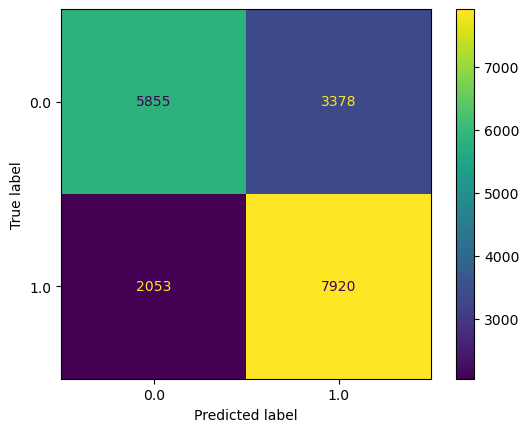

In [11]:
predictions =search.best_estimator_.predict(X_test)
print(classification_report(y_test,predictions))
print('Accuracy',metrics.accuracy_score(y_test,predictions))
print('F1_score',f1_score(y_test,predictions, average='macro'))
print('Recall',recall_score(y_test,predictions))
ConfusionMatrixDisplay.from_predictions(y_test,predictions)